In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn import preprocessing
from sklearn import feature_selection
from scipy import stats

In [2]:
df = pd.read_csv('combined_cleaned_data.csv')
df.describe()

,AIRLINE,ORIGIN FLIGHT NO.,ORIGIN AIRPORT,A/C TYPE,STA (WIB),DEPT FLIGHT NO.,DEPT AIRPORT,A/C TYPE.1,STD (WIB),PLANNING PARKING,PLANNING GATE,date_flight
count,866,791,866,791,862,790,791,864,791,862,861,866
unique,10,78,22,9,91,79,20,10,88,12,12,19
top,LNI,CTV968,CGK,A320,00:00:00,GIA155,CGK,A320,07:40:00,AE5,A6,2025-04-04
freq,296,19,290,407,71,23,292,409,37,161,140,51


In [3]:
# df.isnull().sum()
null_persent = df.isnull().mean() * 100

print(null_persent)

AIRLINE               0.000000
ORIGIN FLIGHT NO.     8.660508
ORIGIN AIRPORT        0.000000
A/C TYPE              8.660508
STA (WIB)             0.461894
DEPT FLIGHT NO.       8.775982
DEPT AIRPORT          8.660508
A/C TYPE.1            0.230947
STD (WIB)             8.660508
PLANNING PARKING      0.461894
PLANNING GATE         0.577367
date_flight           0.000000
dtype: float64


In [ ]:
total_rows = len(df)

null_info = pd.DataFrame({
    "total_null": df.isnull().sum(),
    "percent_null": df.isnull().mean() * 100,
})

print(null_info)

                    total_null  percent_null  total_rows
AIRLINE                      0      0.000000         866
ORIGIN FLIGHT NO.           75      8.660508         866
ORIGIN AIRPORT               0      0.000000         866
A/C TYPE                    75      8.660508         866
STA (WIB)                    4      0.461894         866
DEPT FLIGHT NO.             76      8.775982         866
DEPT AIRPORT                75      8.660508         866
A/C TYPE.1                   2      0.230947         866
STD (WIB)                   75      8.660508         866
PLANNING PARKING             4      0.461894         866
PLANNING GATE                5      0.577367         866
date_flight                  0      0.000000         866


In [8]:
#Split data with null
# Baris yang punya minimal 1 nilai NaN
df_with_null = df[df.isnull().any(axis=1)].copy()

# Simpan ke file CSV
df_with_null.to_csv("data_baris_dengan_null.csv", index=False)

print(f"Total baris dengan missing value: {len(df_with_null)}")

Total baris dengan missing value: 151


In [10]:
df_complete = df.dropna().copy()
df_complete.to_csv("data_lengkap_tanpa_null.csv", index=False)

print(f"Total baris lengkap: {len(df_complete)}")

Total baris lengkap: 715


In [15]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AIRLINE             866 non-null    object
 1   ORIGIN FLIGHT NO.   791 non-null    object
 2   ORIGIN AIRPORT      866 non-null    object
 3   A/C TYPE            791 non-null    object
 4   STA (WIB)           862 non-null    object
 5   DEPT FLIGHT NO.     790 non-null    object
 6   DEPT AIRPORT        791 non-null    object
 7   A/C TYPE.1          864 non-null    object
 8   STD (WIB)           791 non-null    object
 9   PLANNING PARKING    862 non-null    object
 10  PLANNING GATE       861 non-null    object
 11  date_flight         866 non-null    object
dtypes: object(12)
memory usage: 81.3+ KB


None

In [12]:
display(df_complete)
display(df.describe(include=object))

,AIRLINE,ORIGIN FLIGHT NO.,ORIGIN AIRPORT,A/C TYPE,STA (WIB),DEPT FLIGHT NO.,DEPT AIRPORT,A/C TYPE.1,STD (WIB),PLANNING PARKING,PLANNING GATE,date_flight
7,LNI,LNI975,BPN,B739,13:15:00,LNI970,SUB,B739,07:40:00,AE8,A8,2025-04-17
8,CTV,CTV989,PLM,A320,07:05:00,CTV932,PKU,A320,07:40:00,AE2,A4,2025-04-17
9,LNI,LNI246,PLM,B739,07:10:00,LNI239,PKU,B739,07:45:00,AE6,A8,2025-04-17
10,LNI,LNI370,CGK,B738,07:10:00,LNI373,CGK,B739,08:00:00,AE4,A7,2025-04-17
11,CTV,CTV940,CGK,A320,07:25:00,CTV941,CGK,A320,07:55:00,AE1,A3,2025-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...
858,CTV,CTV944,CGK,A320,18:00:00,CTV945,CGK,A320,18:30:00,AE3,A4,2025-04-12
859,LNI,LNI989,PNK,B739,18:10:00,LNI989,KNO,B739,19:10:00,AE5,A7,2025-04-12
860,CTV,CTV923,KNO,A320,18:15:00,CTV988,PLM,A320,18:45:00,AE2,A3,2025-04-12
861,GIA,GIA156,CGK,B738,18:40:00,GIA159,CGK,B738,19:25:00,AE3,A5,2025-04-12


,AIRLINE,ORIGIN FLIGHT NO.,ORIGIN AIRPORT,A/C TYPE,STA (WIB),DEPT FLIGHT NO.,DEPT AIRPORT,A/C TYPE.1,STD (WIB),PLANNING PARKING,PLANNING GATE,date_flight
count,866,791,866,791,862,790,791,864,791,862,861,866
unique,10,78,22,9,91,79,20,10,88,12,12,19
top,LNI,CTV968,CGK,A320,00:00:00,GIA155,CGK,A320,07:40:00,AE5,A6,2025-04-04
freq,296,19,290,407,71,23,292,409,37,161,140,51


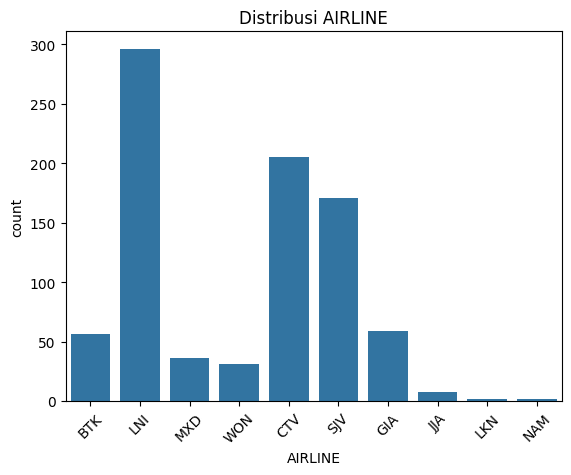

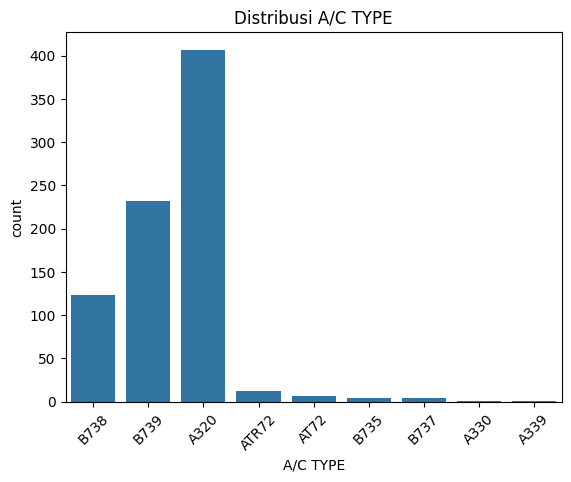

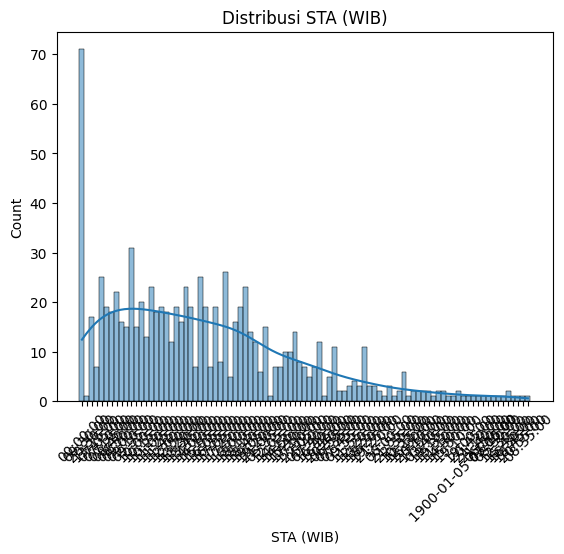

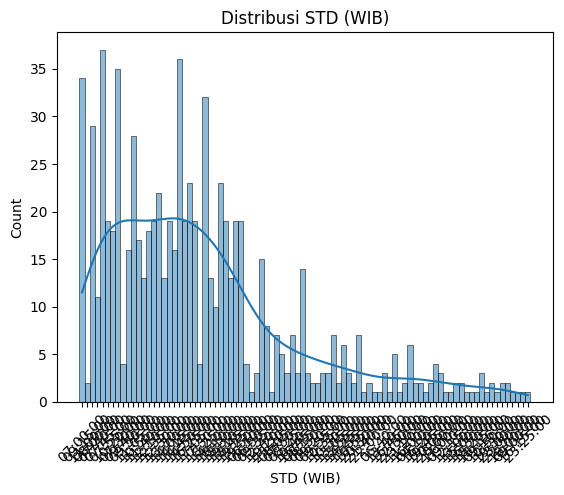

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kolom AIRLINE
sns.countplot(data=df, x='AIRLINE')
plt.title('Distribusi AIRLINE')
plt.xticks(rotation=45)
plt.show()

# Visualisasi distribusi untuk kolom A/C TYPE
sns.countplot(data=df, x='A/C TYPE')
plt.title('Distribusi A/C TYPE')
plt.xticks(rotation=45)
plt.show()

# Jika ada kolom waktu (misalnya STA (WIB) dan STD (WIB))
sns.histplot(df['STA (WIB)'], kde=True)
plt.title('Distribusi STA (WIB)')
plt.xticks(rotation=45)
plt.show()

sns.histplot(df['STD (WIB)'], kde=True)
plt.title('Distribusi STD (WIB)')
plt.xticks(rotation=45)
plt.show()